Finished Training. 
 MSE: 1.1045537551374314
Finished Training. 
 MSE: 0.009994928846193237
Finished Training. 
 MSE: 0.010229411797121234
Finished Training. 
 MSE: 0.989092889100499
Finished Training. 
 MSE: 0.009960706357117672
Finished Training. 
 MSE: 0.009997357753392482
Finished Training. 
 MSE: 0.14265199204075824
Finished Training. 
 MSE: 0.9996317940556746
Finished Training. 
 MSE: 0.5128134615286086
Finished Training. 
 MSE: 0.46661500759242036
Finished Training. 
 MSE: 0.5002335884885157
Finished Training. 
 MSE: 0.4896841495717169
Finished Training. 
 MSE: 0.47692820285271903
Finished Training. 
 MSE: 0.43077455142554066
Finished Training. 
 MSE: 0.49967498136358524
Finished Training. 
 MSE: 0.4988146026513593
Finished Training. 
 MSE: 1.1188757136785323
Finished Training. 
 MSE: 0.009946807113997463
Finished Training. 
 MSE: 0.009998097161785539
Finished Training. 
 MSE: 0.49126425166208
Finished Training. 
 MSE: 0.009903690058356902
Finished Training. 
 MSE: 0.00998782712

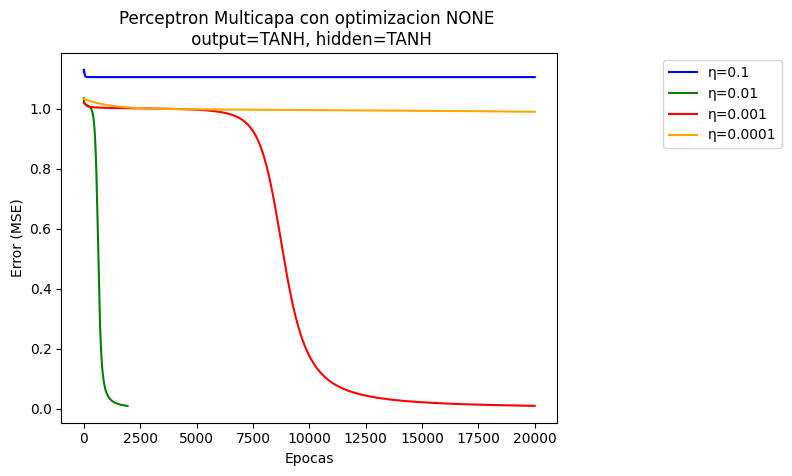

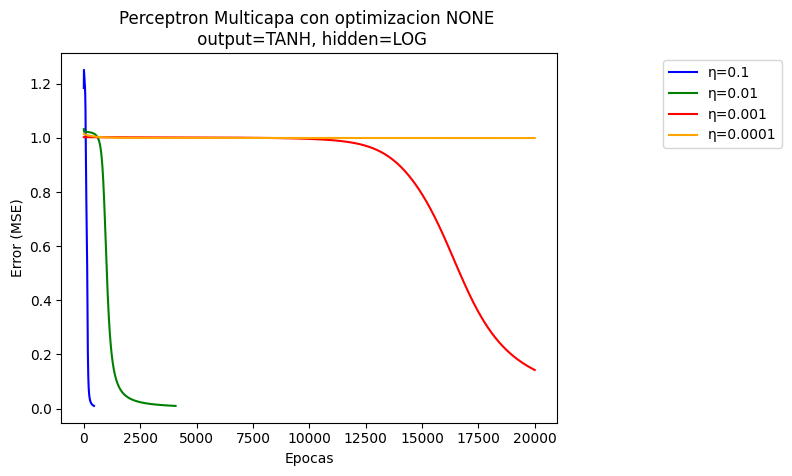

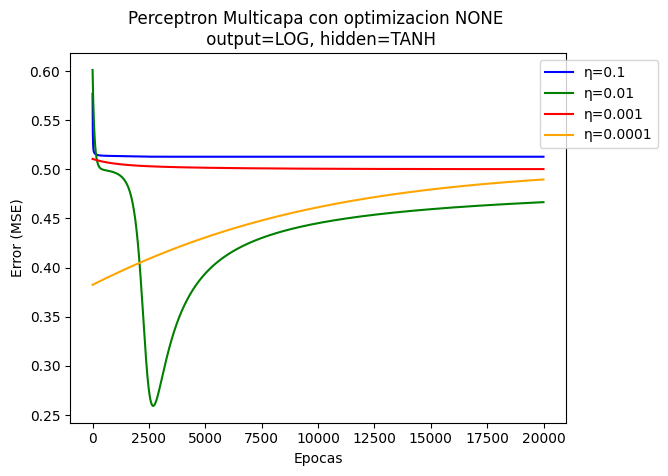

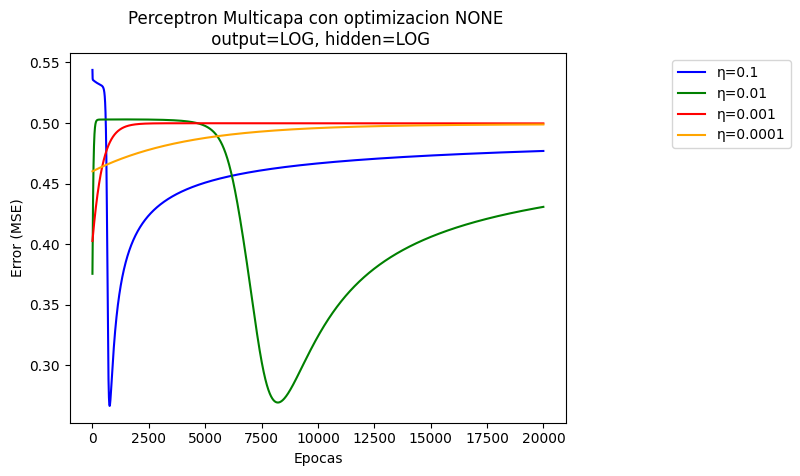

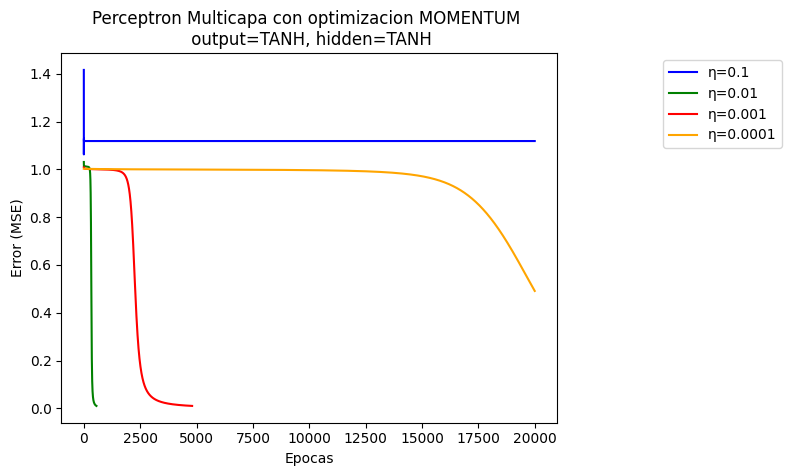

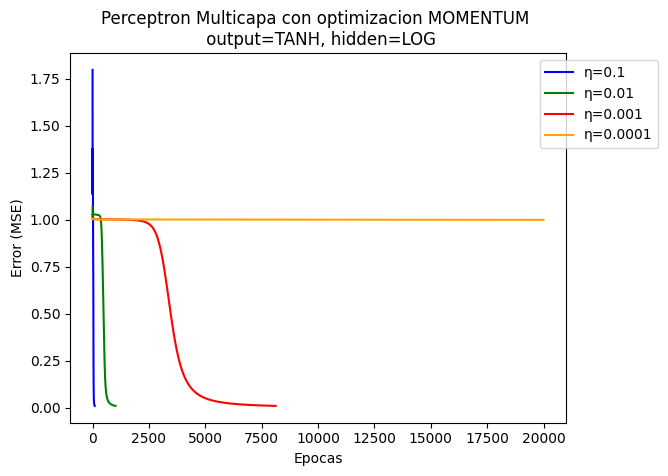

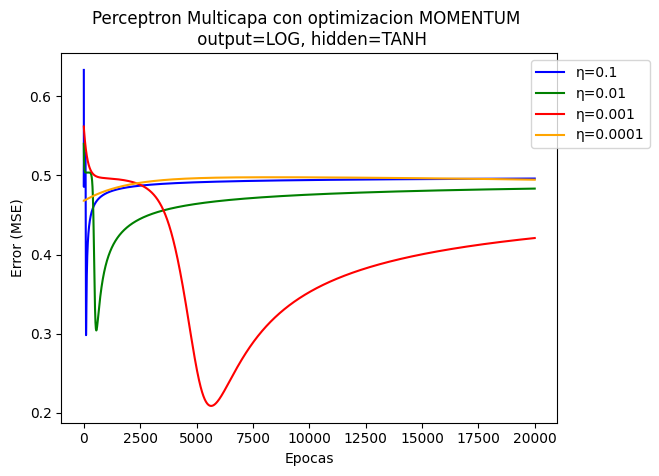

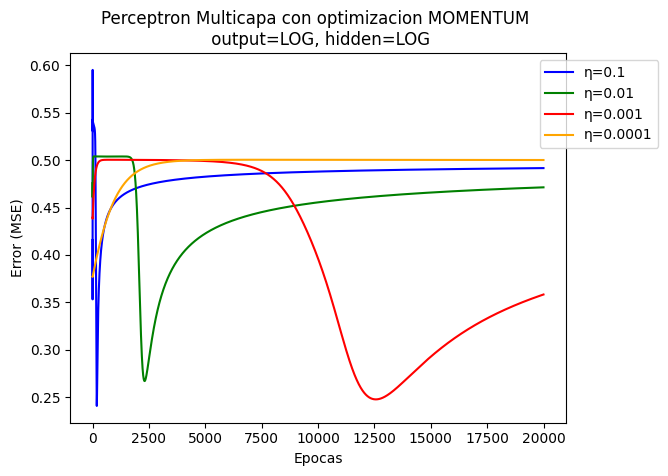

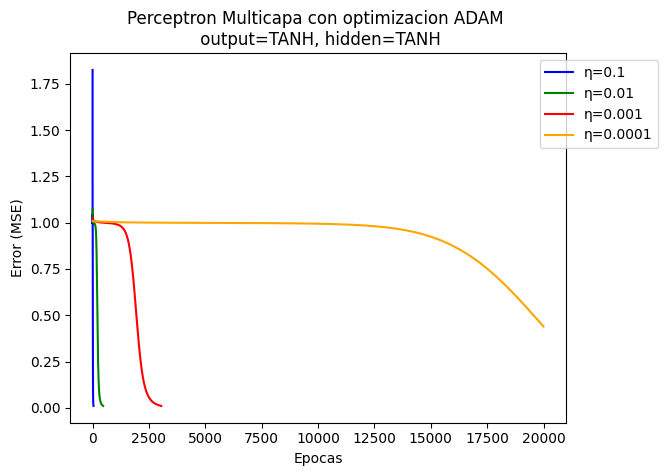

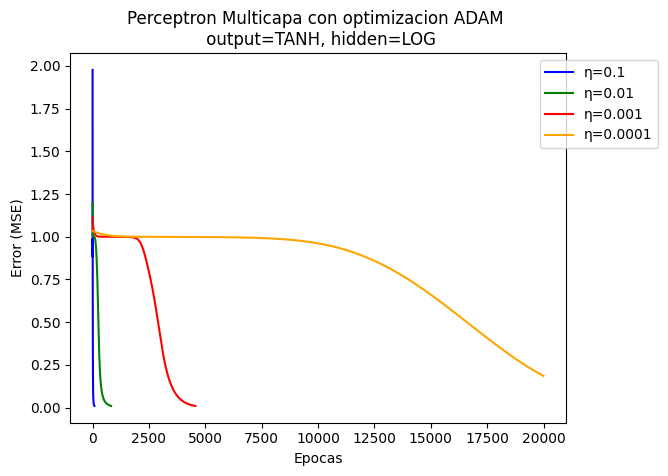

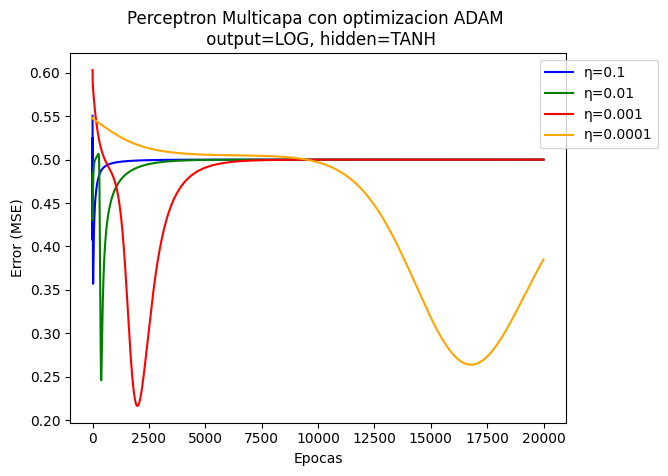

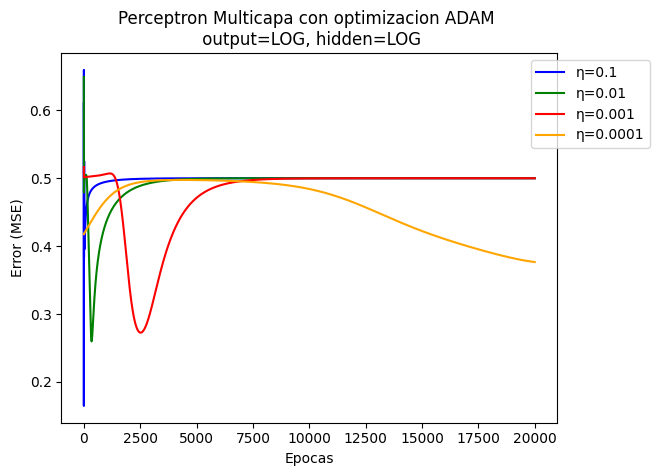

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import read_data
from src.perceptron import MultilayerPerceptron

PATH = "./data/Ej3A-XOR.txt"

OUTPUT_ACTIVATION = ["TANH", "LOG"]
HIDDEN_ACTIVATION = ["TANH", "LOG"]
BETA = 1

TRAINING_TYPE = ["PERCENTAGE", "K-FOLD"]
LR = 0.1
BIAS = 1
EPOCHS = 20000
MIN_ERROR = 0.01
TRAINING_PERCENTAGE = 0.8

QTY_HIDDEN_LAYERS = 1
QTY_NODES_IN_HIDDEN_LAYERS = [6]

OPTIMIZER_METHOD = ["NONE", "MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

input_data, expected_data = read_data(PATH)


#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [round(LR*(10**(-i)),4) for i in range(4)]

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for out_act in OUTPUT_ACTIVATION:
        arr_of_error_aux2 = []
        arr_of_epochs_aux2 = []
        for hidden_act in HIDDEN_ACTIVATION:
            arr_of_error_aux3 = []
            arr_of_epochs_aux3 = []
            for lr in lrs:
                perceptron = MultilayerPerceptron(input_data, expected_data, lr, BIAS,
                                                EPOCHS, TRAINING_PERCENTAGE, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                out_act, hidden_act, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON)
                mse_errors, total_epochs = perceptron.train()
                arr_of_error_aux3.append(mse_errors)
                arr_of_epochs_aux3.append(total_epochs)

            arr_of_error_aux2.append(arr_of_error_aux3)
            arr_of_epochs_aux2.append(arr_of_epochs_aux3)

        arr_of_error_aux.append(arr_of_error_aux2)
        arr_of_epochs_aux.append(arr_of_epochs_aux2)

    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange']

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    for j, out_act in enumerate(OUTPUT_ACTIVATION):
        for k, hidden_act in enumerate(HIDDEN_ACTIVATION):
            for s in range(len(arr_of_errors[i][j][k])):
                plt.plot(range(arr_of_epochs[i][j][k][s]), arr_of_errors[i][j][k][s], color=colors[s], label=f"η={lrs[s]}")
            plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={out_act}, hidden={hidden_act}')
            plt.xlabel("Epocas")
            plt.ylabel("Error (MSE)")
            plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
            plt.show()
       

Finished Training. 
 MSE: 1.001013455560694
Finished Training. 
 MSE: 1.000673416376083
Finished Training. 
 MSE: 0.05348655994171784
Finished Training. 
 MSE: 0.009999108246175973
Finished Training. 
 MSE: 0.01743111032398314
Finished Training. 
 MSE: 0.04983241175659155
Finished Training. 
 MSE: 0.009998798902743205
Finished Training. 
 MSE: 0.009999451153993331
Finished Training. 
 MSE: 0.009998880379816132
Finished Training. 
 MSE: 0.009999882010440402
Finished Training. 
 MSE: 0.01154431104024436
Finished Training. 
 MSE: 0.009999700157012575
Finished Training. 
 MSE: 0.009999437218762331
Finished Training. 
 MSE: 0.040444473784022626
Finished Training. 
 MSE: 0.01331616363056529
Finished Training. 
 MSE: 0.019709056193139875
Finished Training. 
 MSE: 0.009999877188893894
Finished Training. 
 MSE: 0.01422932338849851
Finished Training. 
 MSE: 0.01708163501201084
Finished Training. 
 MSE: 0.009999197457026258
Finished Training. 
 MSE: 0.009998870549832681
Finished Training. 
 MSE: 

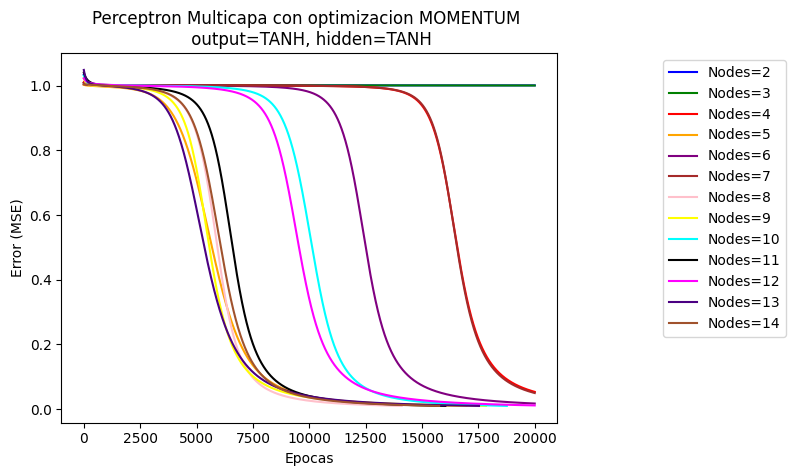

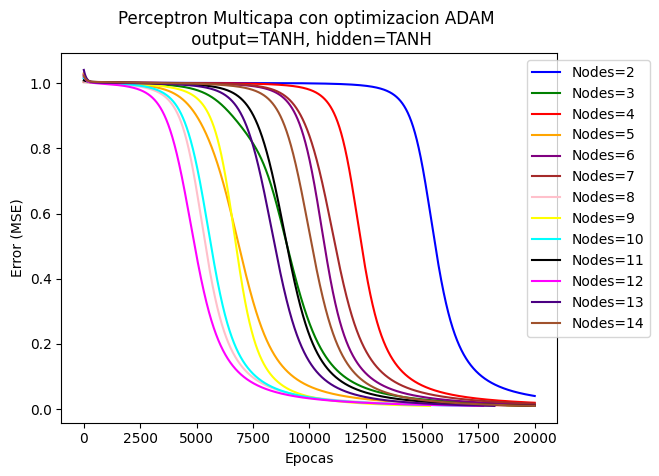

In [14]:
#-------------------------------------------------
# VARIANDO LOS NODOS EN LA CAPA INTERMEDIA
#-------------------------------------------------

LR = 0.001
QTY_HIDDEN_LAYERS = 1
OUTPUT_ACT = "TANH"
HIDDEN_ACT = "TANH"
OPTIMIZATION_METHOD = ["MOMENTUM","ADAM"]

arr_of_errors = []
arr_of_epochs = []

for opt_method in enumerate(OPTIMIZATION_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for qty_nodes in range(2, 15):
        perceptron = MultilayerPerceptron(input_data, expected_data, LR, BIAS,
                                        EPOCHS, TRAINING_PERCENTAGE, MIN_ERROR,
                                        QTY_HIDDEN_LAYERS, [qty_nodes], 
                                        OUTPUT_ACT, HIDDEN_ACT, BETA,
                                        opt_method, ALPHA, BETA1, BETA2, EPSILON)
        mse_errors, total_epochs = perceptron.train()
        arr_of_error_aux.append(mse_errors)
        arr_of_epochs_aux.append(total_epochs)
        
    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', "yellow", "cyan", "black", "magenta", "indigo", "sienna", "grey", "tan"]

for i, opt_method in enumerate(OPTIMIZATION_METHOD):
    for j in range(len(arr_of_errors[i])):
        plt.plot(range(arr_of_epochs[i][j]), arr_of_errors[i][j], color=colors[j], label=f"Nodes={j+2}")
    plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={OUTPUT_ACT}, hidden={HIDDEN_ACT}')
    plt.xlabel("Epocas")
    plt.ylabel("Error (MSE)")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

Finished Training. 
 MSE: 1.0000421563813942
Finished Training. 
 MSE: 1.00020379801083
Finished Training. 
 MSE: 0.9986596793708022
Finished Training. 
 MSE: 0.30873834685278445
Finished Training. 
 MSE: 0.009999850259459462
Finished Training. 
 MSE: 0.009998298590442323
Finished Training. 
 MSE: 0.00999896385974581
Finished Training. 
 MSE: 0.009999817862778728
Finished Training. 
 MSE: 0.009994871454739537
Finished Training. 
 MSE: 0.009999572186063139
Finished Training. 
 MSE: 1.000055884181413
Finished Training. 
 MSE: 1.0000850530325753
Finished Training. 
 MSE: 1.0003101695523196
Finished Training. 
 MSE: 0.03281836419827684
Finished Training. 
 MSE: 0.00999942515028251
Finished Training. 
 MSE: 0.009998120180890538
Finished Training. 
 MSE: 0.009998885421284924
Finished Training. 
 MSE: 0.009996771644894119
Finished Training. 
 MSE: 0.0099969704660186
Finished Training. 
 MSE: 0.009997670662460356


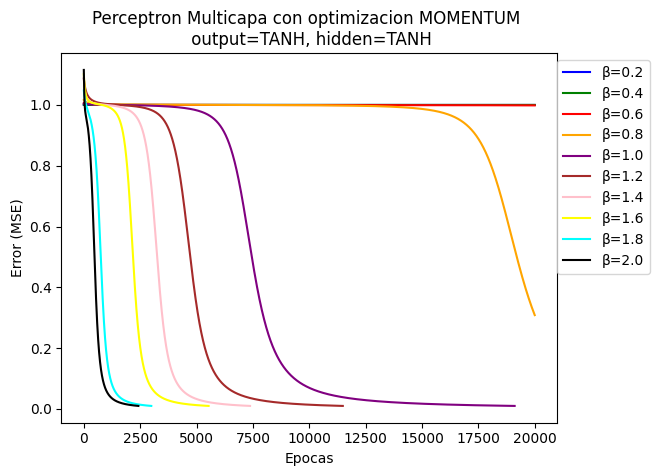

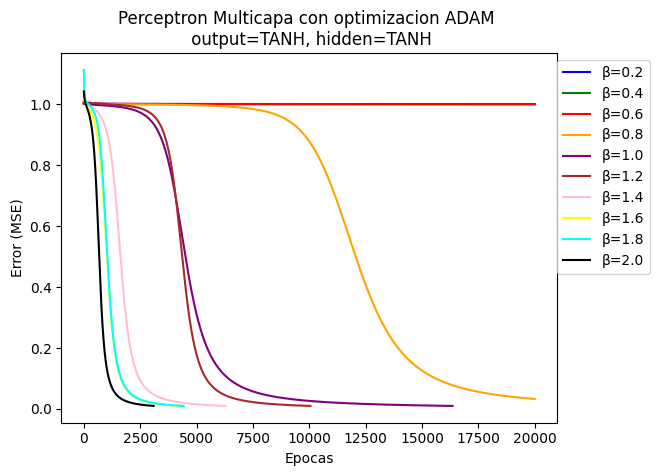

In [16]:
#-------------------------------------------------
# VARIANDO EL VALOR DE BETA DE ACTIVACION
#-------------------------------------------------

LR = 0.001
QTY_HIDDEN_LAYERS = 1
OUTPUT_ACT = "TANH"
HIDDEN_ACT = "TANH"
OPTIMIZATION_METHOD = ["MOMENTUM","ADAM"]
QTY_NODES_IN_HIDDEN_LAYERS = [10]

BETAS = [round(0.2*i,2) for i in range(1,11)]

arr_of_errors = []
arr_of_epochs = []

for opt_method in enumerate(OPTIMIZATION_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for beta in BETAS:
        perceptron = MultilayerPerceptron(input_data, expected_data, LR, BIAS,
                                        EPOCHS, TRAINING_PERCENTAGE, MIN_ERROR,
                                        QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                        OUTPUT_ACT, HIDDEN_ACT, beta,
                                        opt_method, ALPHA, BETA1, BETA2, EPSILON)
        mse_errors, total_epochs = perceptron.train()
        arr_of_error_aux.append(mse_errors)
        arr_of_epochs_aux.append(total_epochs)
        
    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', "yellow", "cyan", "black", "magenta", "indigo", "sienna", "grey", "tan"]

for i, opt_method in enumerate(OPTIMIZATION_METHOD):
    for j in range(len(arr_of_errors[i])):
        plt.plot(range(arr_of_epochs[i][j]), arr_of_errors[i][j], color=colors[j], label=f"β={BETAS[j]}")
    plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={OUTPUT_ACT}, hidden={HIDDEN_ACT}')
    plt.xlabel("Epocas")
    plt.ylabel("Error (MSE)")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()